In [1]:
import torch, os, pickle, time
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os.path as osp
import networkx as nx
path='~/../../tigress/cj1223/merger_trees/isotrees/'
transform_path='~/../../tigress/cj1223/gmdata/transformer'
all_cols=np.array([0,2,4,10,11,12,13,14,15,16,23,24,25,35]+list(range(37,60)))


In [2]:
os.listdir(osp.expanduser('~/../../../scratch/gpfs/cj1223/GraphStorage/'))

['vlarge_all_4t_z1.0_standard_quant',
 'vlarge_all_4t_z0.3_quantile_raw',
 'vlarge_4t_quantile_raw_redshift_75_all',
 'vlarge_all_4t_z1.0_quantile_raw',
 'vlarge_all_4t_z0.3_None',
 'vlarge_all_4t_z3.0_quantile_raw',
 'test_all_8t_z0.0_None',
 'vlarge_all_4t_z2.0_standard_quant',
 'vlarge_all_4t_z0.8_quantile_raw',
 'tvt_idx',
 'vlarge_all_4t_z2.0_None',
 'redshift_scan_0',
 'testid_all_4t_z2.0_None',
 'vlarge_all_4t_z0.0_quantile_stand',
 'vlarge_all_multi_try1',
 'vlarge_4t_quantile_raw_redshift_99_all',
 'vlarge_all_4t_z2.0_quantile_raw',
 'vlarge_all_4t_z0.0_standard_quant',
 'raw_raw_final_6t',
 'vlarge_all_4t_z0.5_quantile_quant',
 'vlarge_4t_quantile_raw_redshift_50_all',
 'vlarge_all_4t_z2.0_quantile_stand',
 'vlarge_all_t_quantile_raw_rm_final',
 'vlarge_all_4t_z1.0_quantile_quant',
 'vlarge_all_allt_z0.0_quantile_raw_rm',
 'transformers',
 'vlarge_all_4t_z0.0_standard_raw',
 'vlarge_all_4t_quantile_raw_final',
 'vlarge_all_4t_z0.5_standard_stand',
 'vlarge_all_4t_z1.8_quantil

In [3]:
case='vlarge_all_all_t_z0.0_None'
# case = 'vlarge_all_allt_z0.0_quantile_raw_rm'        

data=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'rb'))

In [19]:
xs=[]
ys=[]
ls=[]
# for d in data[:int(len(data)*0.8)]:
for d in data:
    xs.append(d.x.numpy()[0,:])
#     xs.append(d.x.numpy()[0])
    ys.append(d.y.numpy())
    ls.append(len(d.x.numpy()))
xs=np.vstack(xs)
# xs[:,40]=np.log10(xs[:,40])
ys=np.vstack(ys)
ls=np.array(ls)
splits=np.cumsum(ls)

In [20]:
halos=pd.read_table(path+f'isotree_0_0_0.dat', skiprows=0, nrows=1, delimiter='\s+')
halos.columns[all_cols], halos.columns

(Index(['#scale(0)', 'desc_scale(2)', 'num_prog(4)', 'Mvir(10)', 'Rvir(11)',
        'rs(12)', 'vrms(13)', 'mmp?(14)', 'scale_of_last_MM(15)', 'vmax(16)',
        'Jx(23)', 'Jy(24)', 'Jz(25)', 'Tidal_Force(35)', 'Rs_Klypin',
        'Mvir_all', 'M200b', 'M200c', 'M500c', 'M2500c', 'Xoff', 'Voff',
        'Spin_Bullock', 'b_to_a', 'c_to_a', 'A[x]', 'A[y]', 'A[z]',
        'b_to_a(500c)', 'c_to_a(500c)', 'A[x](500c)', 'A[y](500c)',
        'A[z](500c)', 'T/|U|', 'M_pe_Behroozi', 'M_pe_Diemer',
        'Halfmass_Radius'],
       dtype='object'),
 Index(['#scale(0)', 'id(1)', 'desc_scale(2)', 'desc_id(3)', 'num_prog(4)',
        'pid(5)', 'upid(6)', 'desc_pid(7)', 'phantom(8)', 'sam_Mvir(9)',
        'Mvir(10)', 'Rvir(11)', 'rs(12)', 'vrms(13)', 'mmp?(14)',
        'scale_of_last_MM(15)', 'vmax(16)', 'x(17)', 'y(18)', 'z(19)', 'vx(20)',
        'vy(21)', 'vz(22)', 'Jx(23)', 'Jy(24)', 'Jz(25)', 'Spin(26)',
        'Breadth_first_ID(27)', 'Depth_first_ID(28)', 'Tree_root_ID(29)',
        'Or

In [21]:
cols_h = []
for i, col in enumerate(halos.columns[all_cols]):
    if col[-1] == ')':
        cols_h.append(col[:-3]+f'({i})')
    else:
        cols_h.append(col+f'({i})')    
cols_h.append('c_NFW')

In [22]:
c_nfw = np.log10(xs[:,4]/xs[:,14])

In [23]:
xs = np.vstack([xs.T, c_nfw]).T

In [24]:
log_cols = [4, 5,6,9, 14, 20, 21]
xs[:,log_cols] = np.log10(xs[:,log_cols])

100%|██████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 182.15it/s]


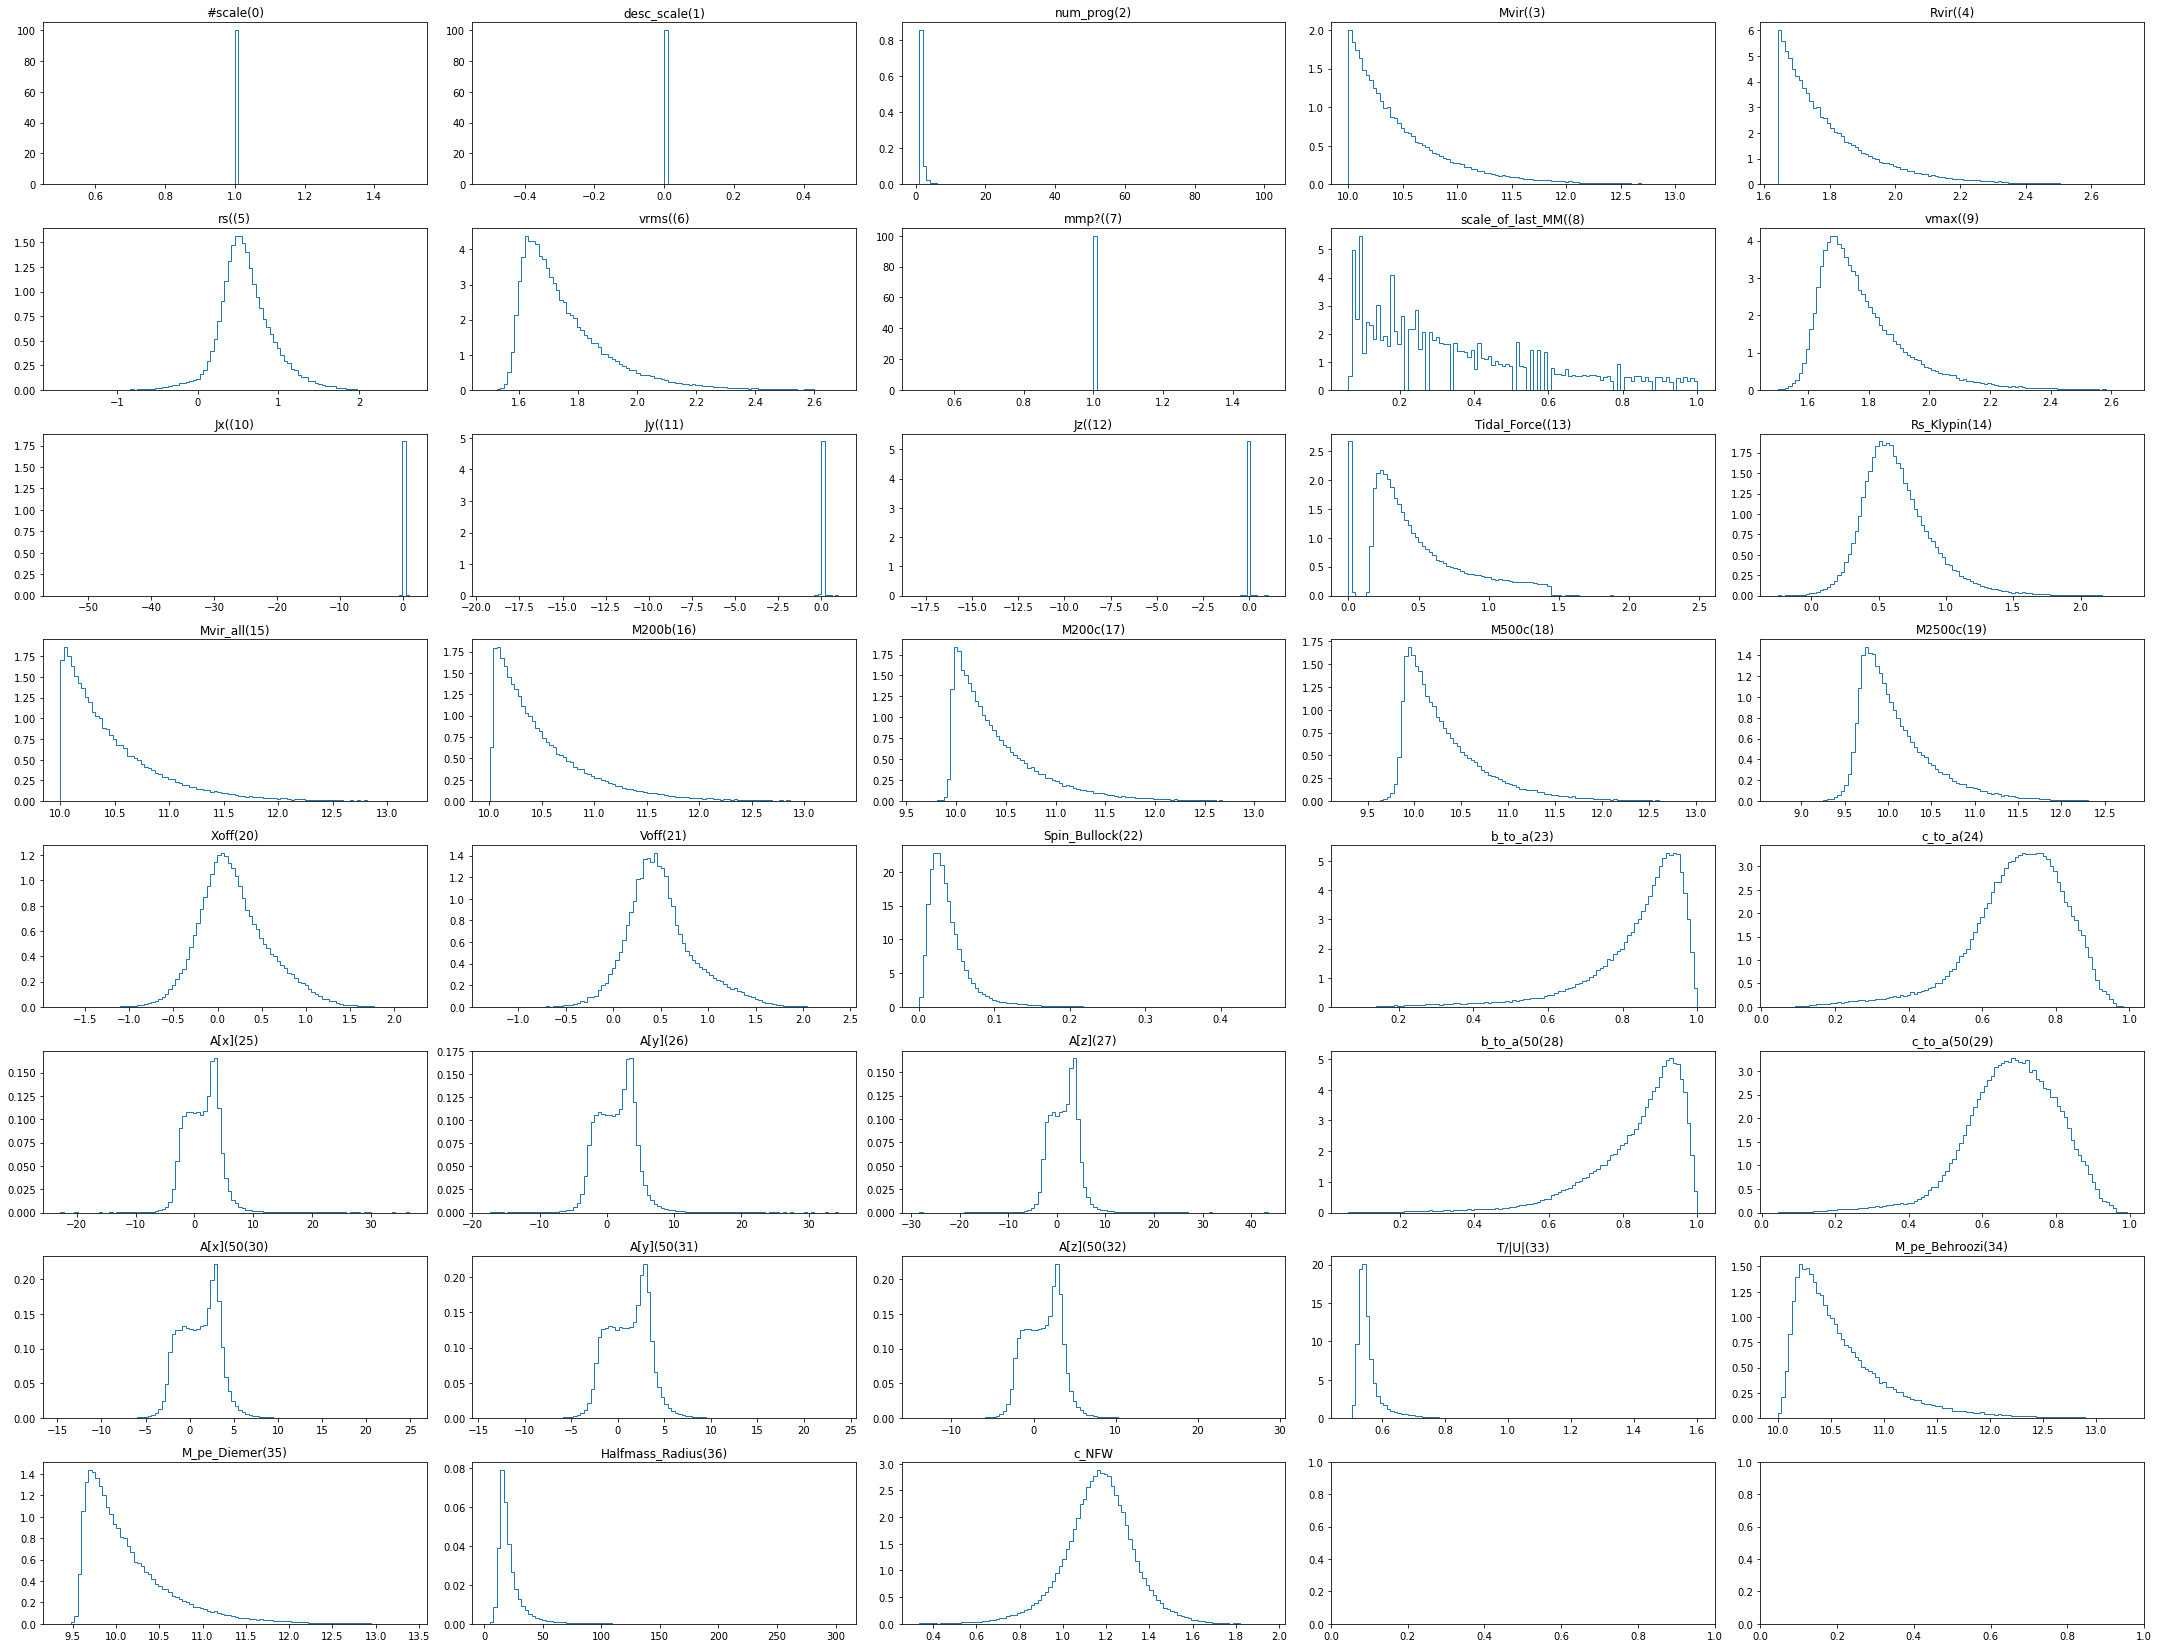

In [25]:
fig,ax=plt.subplots(nrows=8,ncols=5, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

In [26]:
z0_feats = np.array([ 2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36,37])
targets = np.array([8, 15, 19, 21, 23, 27])

In [27]:
xss = []
yss = []

for x, y in zip(xs, ys):
    if np.all( y[targets] > 0):
        xss.append(x[z0_feats])
        yss.append(np.log10(y[targets]))
    else:
        continue
xss=np.vstack(xss)
yss=np.vstack(yss)
len(xss)

108630

In [28]:
# mus, scales = np.mean(xss,axis=0), np.std(xss,axis=0)
# mus, scales =(array([ 1.3043818e+00,  1.0482839e+01,  6.8827255e+01,  5.5631461e+00,
#          6.1627102e+01,  3.5166168e-01,  6.4789871e+01, -6.0743326e-04,
#         -7.2524161e-04, -1.0647699e-03,  4.9036452e-01,  5.4335928e+00,
#          1.0488175e+01,  1.0514258e+01,  1.0427412e+01,  1.0331637e+01,
#          1.0102284e+01,  2.4800856e+00,  4.9633760e+00,  3.8996551e-02,
#          8.3892757e-01,  6.9374627e-01,  1.3949696e+00,  1.4162083e+00,
#          1.4180782e+00,  8.3473778e-01,  6.7949873e-01,  1.1404462e+00,
#          1.1499077e+00,  1.1641036e+00,  5.5684698e-01,  1.0600431e+01,
#          1.0140233e+01,  2.2547022e+01], dtype=float32),
#  array([1.5931481e+00, 4.6887007e-01, 3.7005737e+01, 7.3534260e+00,
#         3.1689447e+01, 2.3791949e-01, 3.1388607e+01, 7.0497632e-02,
#         9.0221323e-02, 9.6819788e-02, 3.3502483e-01, 5.4994922e+00,
#         4.6876633e-01, 4.7106558e-01, 4.6538469e-01, 4.6102148e-01,
#         4.5496431e-01, 3.6341157e+00, 7.2529106e+00, 2.8715109e-02,
#         1.3576227e-01, 1.3383374e-01, 2.8440909e+00, 2.8351688e+00,
#         2.8433828e+00, 1.2989864e-01, 1.2603475e-01, 2.2782235e+00,
#         2.2766337e+00, 2.2788014e+00, 4.6202425e-02, 4.5650178e-01,
#         5.0597996e-01, 1.5053839e+01], dtype=float32))

In [29]:
np.array(cols_h)[z0_feats]

array(['num_prog(2)', 'Mvir((3)', 'Rvir((4)', 'rs((5)', 'vrms((6)',
       'scale_of_last_MM((8)', 'vmax((9)', 'Jx((10)', 'Jy((11)',
       'Jz((12)', 'Tidal_Force((13)', 'Rs_Klypin(14)', 'Mvir_all(15)',
       'M200b(16)', 'M200c(17)', 'M500c(18)', 'M2500c(19)', 'Xoff(20)',
       'Voff(21)', 'Spin_Bullock(22)', 'b_to_a(23)', 'c_to_a(24)',
       'A[x](25)', 'A[y](26)', 'A[z](27)', 'b_to_a(50(28)',
       'c_to_a(50(29)', 'A[x](50(30)', 'A[y](50(31)', 'A[z](50(32)',
       'T/|U|(33)', 'M_pe_Behroozi(34)', 'M_pe_Diemer(35)',
       'Halfmass_Radius(36)', 'c_NFW'], dtype='<U20')

In [30]:
# scale_feats = np.array([ 0,  1,  2,  3,  4,  5, 7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
#        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

# xss[:, scale_feats] = (xss[:,scale_feats]-mus[scale_feats])/scales[scale_feats]

35it [00:00, 185.02it/s]


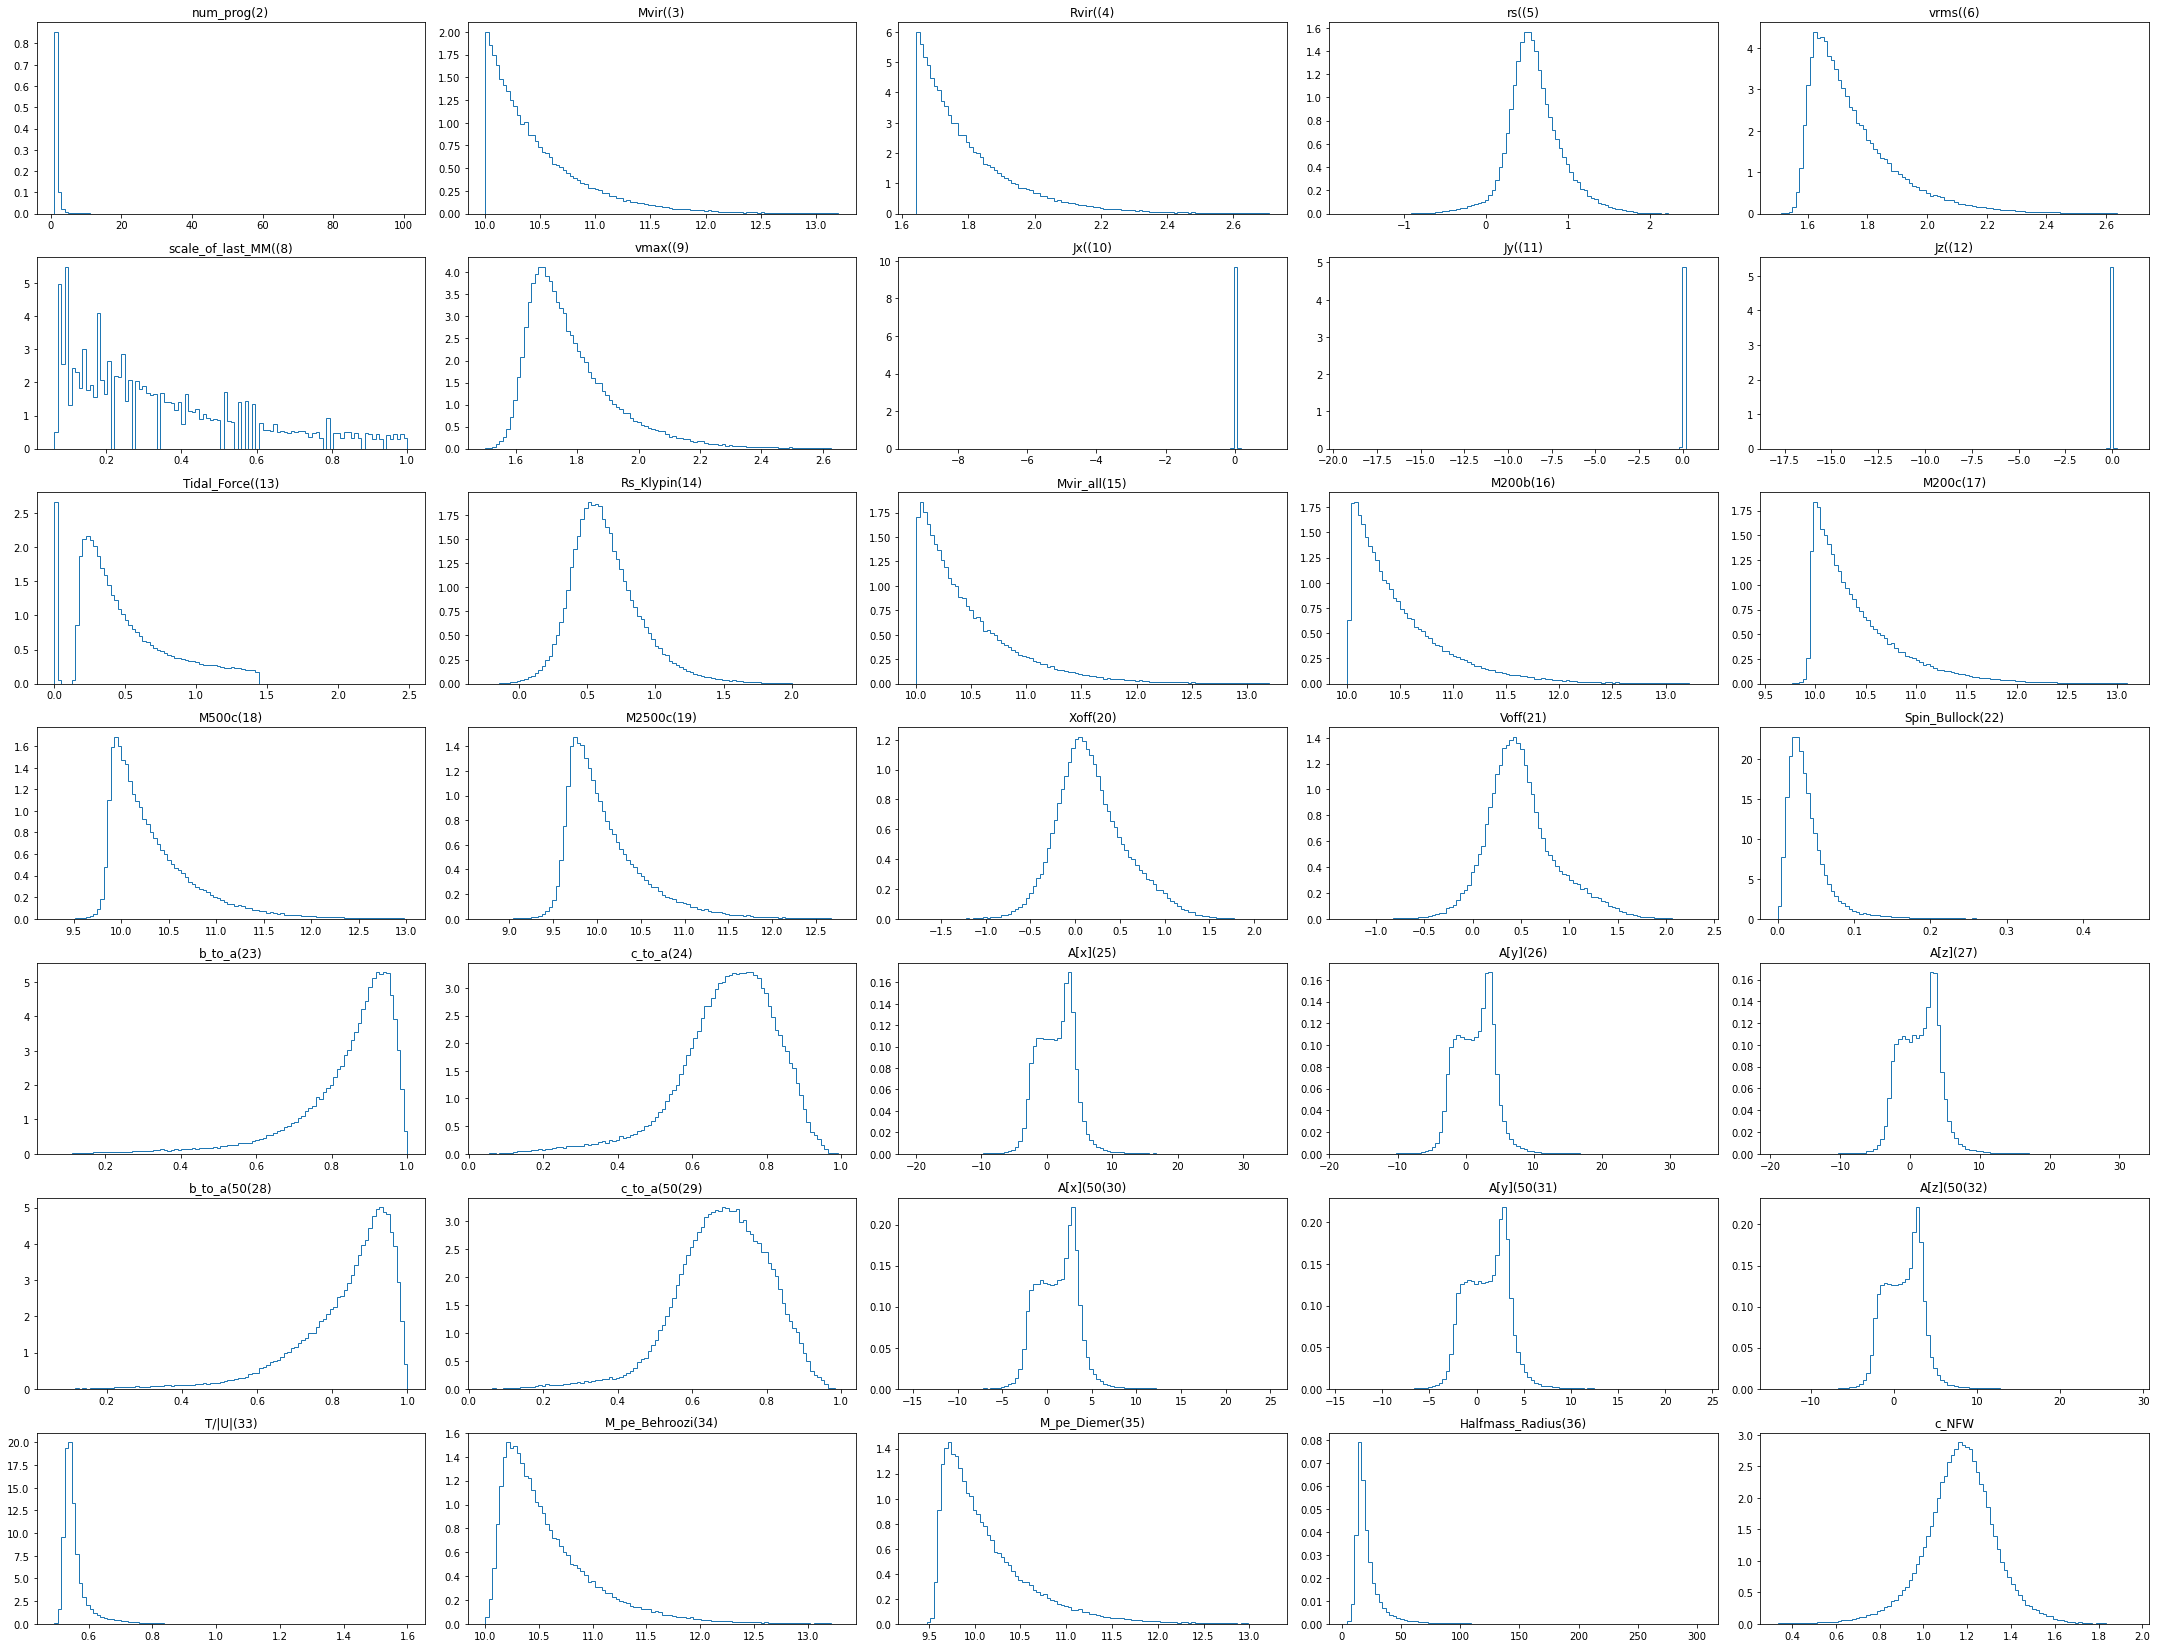

In [31]:
fig,ax=plt.subplots(nrows=7,ncols=5, figsize=(30,23))
ax=ax.flatten()
cols = []
for i, col in tqdm(enumerate(np.array(cols_h)[z0_feats])):
    ax[i].hist(xss[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=col)
    cols.append(col)
fig.tight_layout()

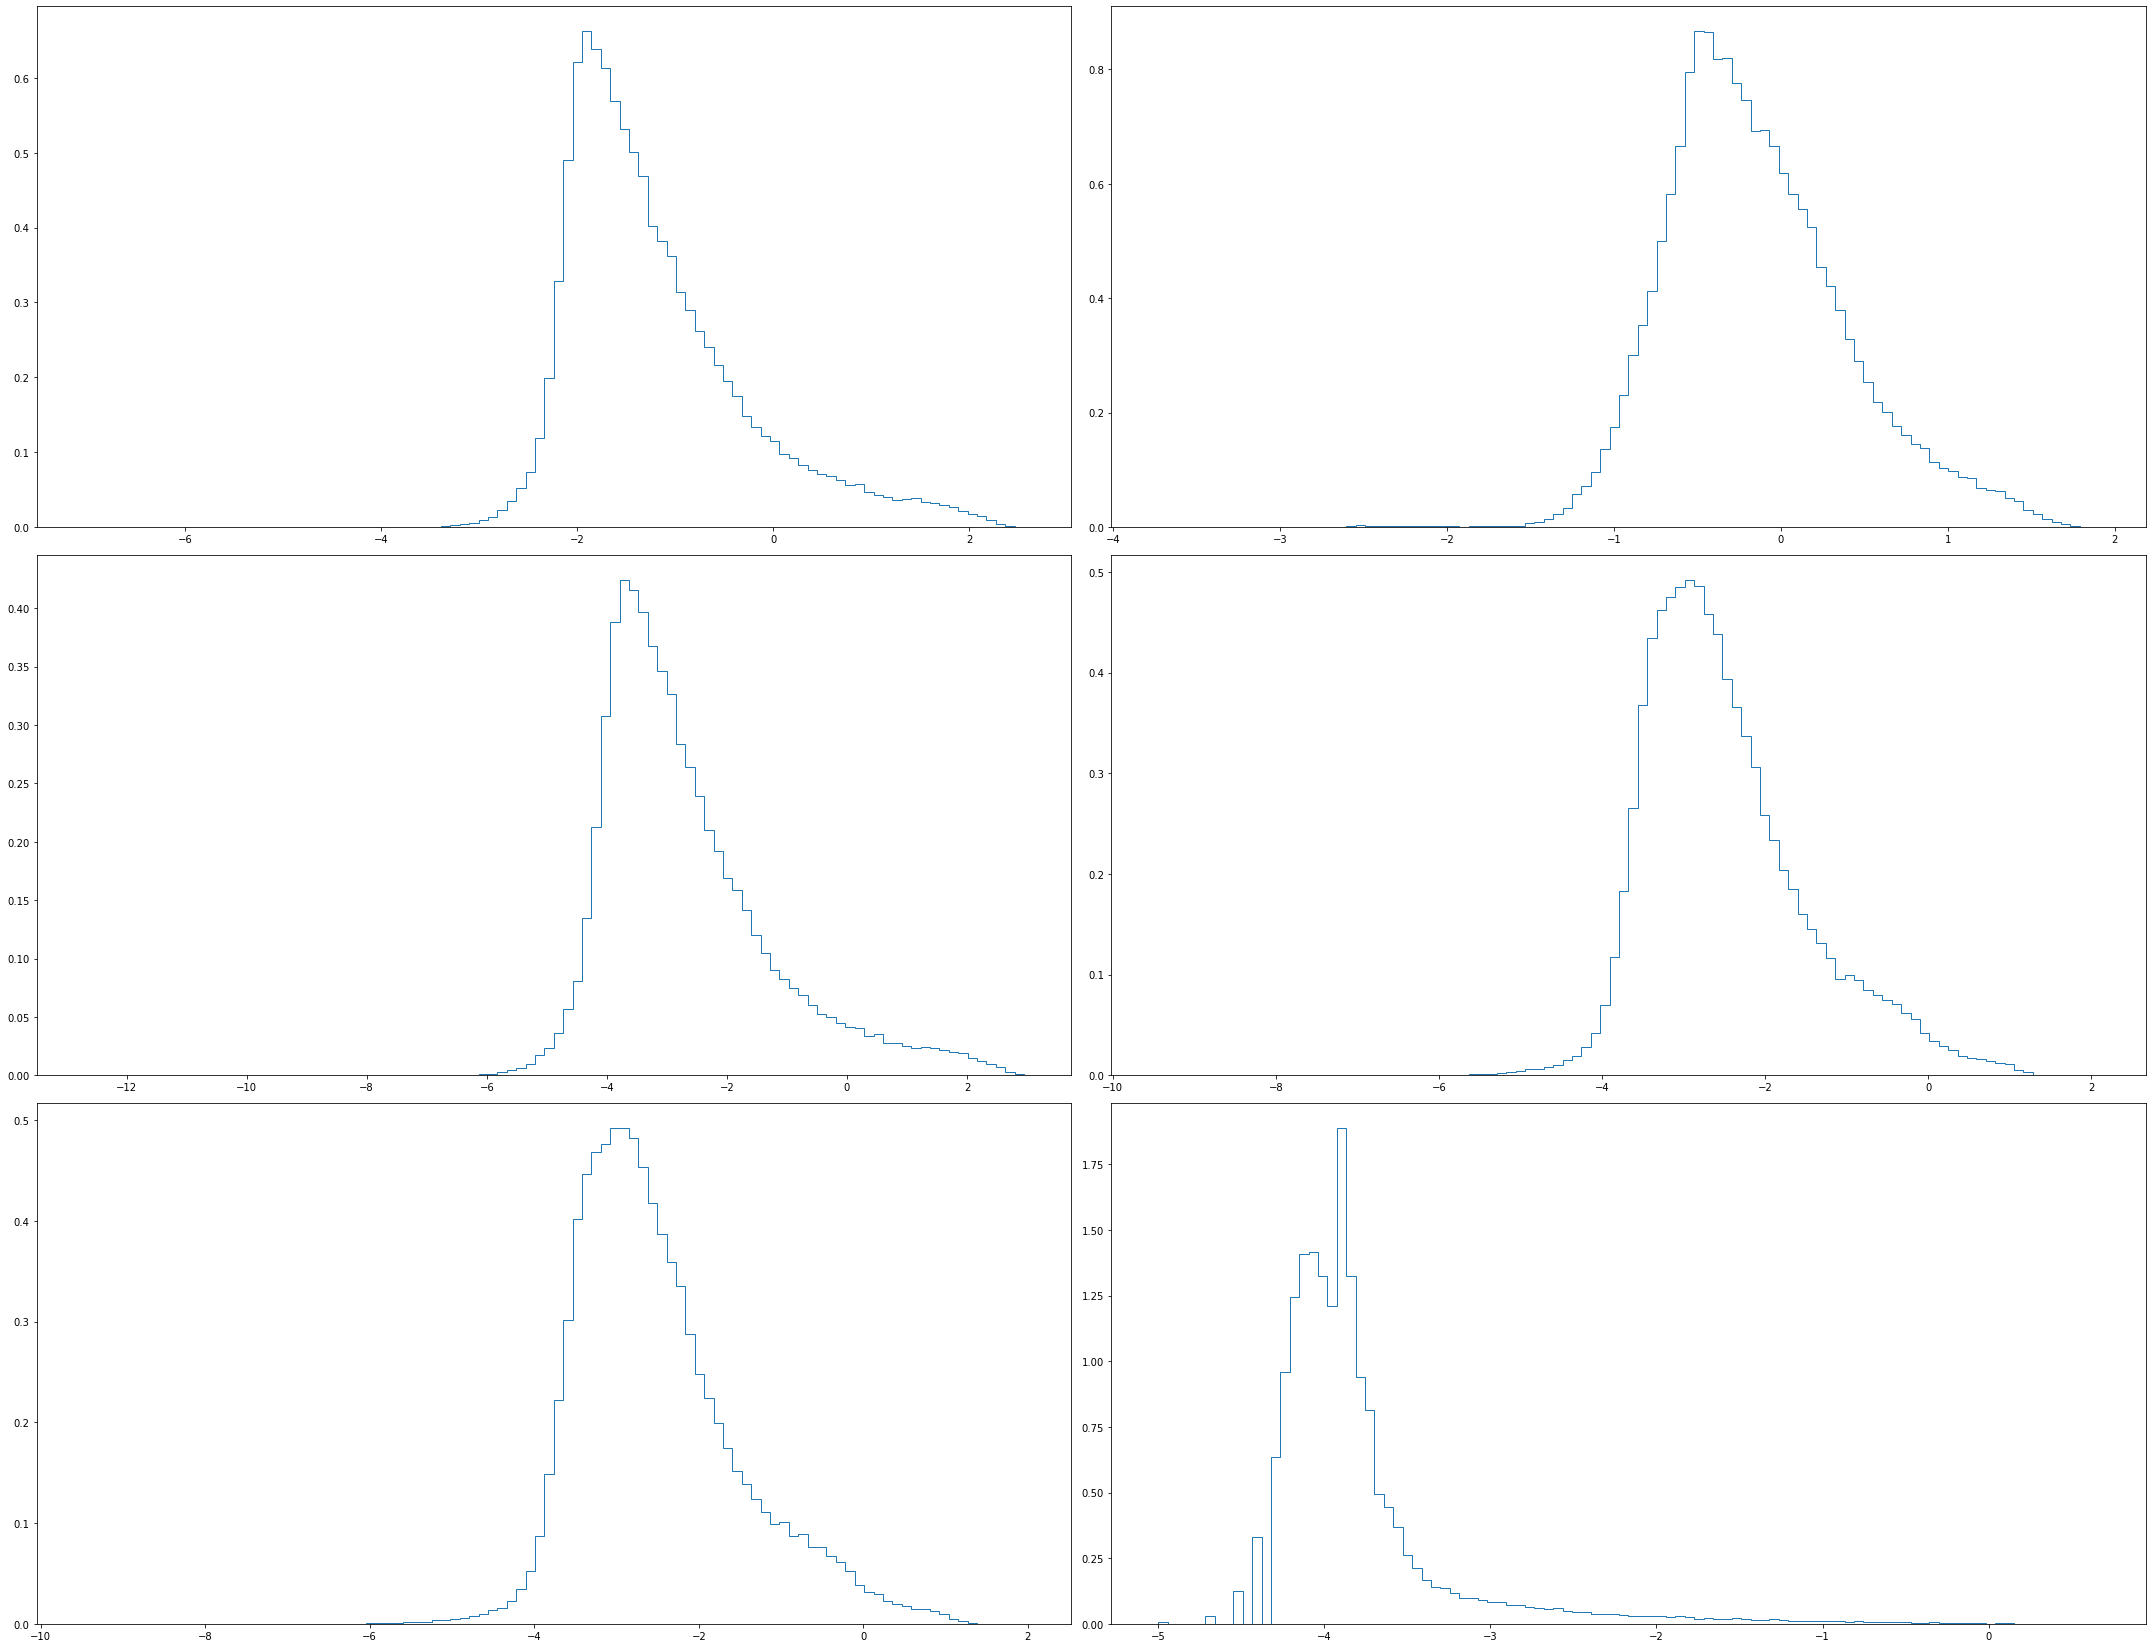

In [32]:
fig,ax=plt.subplots(nrows=3,ncols=2, figsize=(30,23))
ax=ax.flatten()
cols = []
for i in range(len(yss[0])):
    ax[i].hist(yss[:,i], bins=100, density=1, histtype='step');
#     ax[i].set(title=col)
#     cols.append(col)
fig.tight_layout()

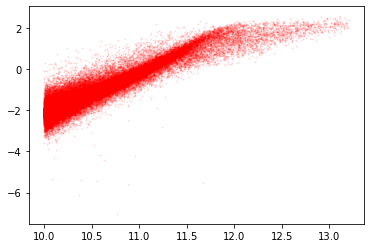

In [33]:
plt.plot(xss[:,1], yss[:,0], 'ro', alpha=0.1, markersize=1)

In [34]:
from torch.utils.data import DataLoader, Dataset

class HaloData(Dataset):
    def __init__(self, x, y, xcols = np.arange(34), ycols = np.arange(6)):
        self.x = x[:, xcols]
        self.y = y[:, ycols]
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_data = HaloData(xss, yss)
test_data = HaloData(xss, yss)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
for b in train_loader:
    print(b)
    break

[tensor([[ 1.0000, 10.0711,  1.6653,  ..., 10.2453,  9.6444, 12.5240],
        [ 1.0000, 10.0648,  1.6631,  ..., 10.1801,  9.6195, 14.0350],
        [ 1.0000, 10.0133,  1.6459,  ..., 10.1978,  9.6062, 11.6510],
        ...,
        [ 1.0000, 10.5571,  1.8272,  ..., 10.7354, 10.1626, 17.9940],
        [ 1.0000, 11.1082,  2.0109,  ..., 11.2844, 10.7128, 27.3220],
        [ 2.0000, 10.4714,  1.7987,  ..., 10.7448, 10.1461, 13.5780]]), tensor([[-1.9363e+00, -6.8118e-01, -3.7747e+00, -3.4757e+00, -3.5134e+00,
         -4.2996e+00],
        [-2.0475e+00, -3.6470e-01, -3.9489e+00, -3.2291e+00, -3.2699e+00,
         -4.1537e+00],
        [-1.9972e+00, -5.7311e-01, -3.8291e+00, -3.5380e+00, -3.5592e+00,
         -3.9991e+00],
        [ 8.9280e-01,  8.4086e-01,  4.6519e-01,  7.8384e-02,  6.3993e-02,
         -2.6189e+00],
        [-1.4544e+00, -4.1460e-01, -3.0403e+00, -3.1986e+00, -3.2210e+00,
         -4.0446e+00],
        [-1.8287e+00, -4.2058e-01, -3.5919e+00, -3.4689e+00, -2.5636e+00,
     

In [35]:
os.mkdir(osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/raw_raw_final_6t2"))
data_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/raw_raw_final_6t2/xs.pkl")
with open(data_path, 'wb') as handle:
    pickle.dump(xss, handle)
    
data_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/raw_raw_final_6t2/ys.pkl")
with open(data_path, 'wb') as handle:
    pickle.dump(yss, handle)